## Chennai House Price Prediction Case Study

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

###  Importing and Merging Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train-chennai-sale.csv") #read the dataset
print(df.shape)
df.head()

(7109, 22)


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


### Understanding the DataSet

Data is about the Chennai house sale price can be found in train-chennai-sale.csv

The columns are:     
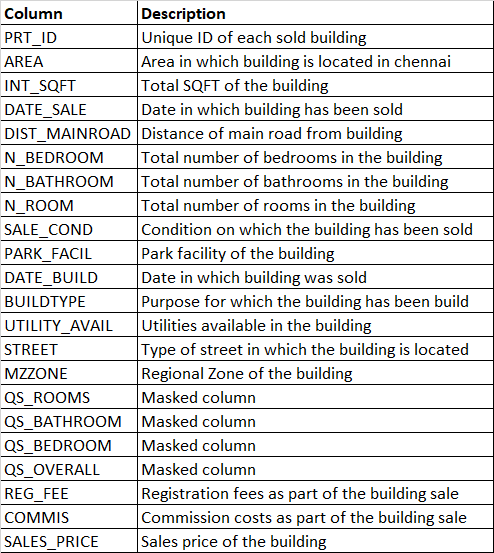


### Categorical Column Description

   #### SALE_COND Column: 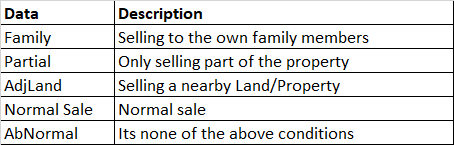

#### BUILDTYPE Column: 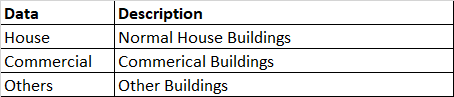
#### MZZONE Column: 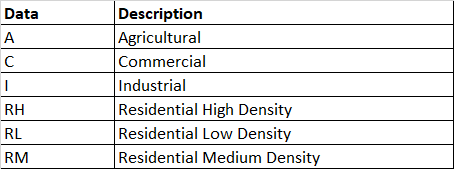
   **PARK_FACIL Column** :         Parking Facility available or not(Yes/No)
   
   **UTILITY_AVAIL Column** :         What are all the Utilities that are available in the building
   
   **STREET Column** :         Type of Road(Paved/Gravel/No Access) were the building is located

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### Data Cleaning

In [4]:
#Checking for null values in the dataset
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

### Fill Null Values

In [5]:
a_bed = df['N_BEDROOM'].mode().values
a_bath = df['N_BATHROOM'].mode().values

df['N_BEDROOM'] = df['N_BEDROOM'].fillna(np.float64(a_bed).item())
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(np.float64(a_bath).item())


We have found QS_OVERALL Column have relationship with QS_ROOMS, QS_BATHROOM, QS_BEDROOM        

In [6]:
print('Difference between Avg of QS_BATHROOM,QS_BEDROOM,QS_ROOMS and QS_OVERALL :',(df['QS_OVERALL'] - ((df['QS_BATHROOM']+df['QS_BEDROOM']+df['QS_ROOMS'])/3)).abs().mean())
print('Difference between Mean of QS_OVERALL and QS_OVERALL :',(df['QS_OVERALL'] - df['QS_OVERALL'].mean()).abs().mean())

Difference between Avg of QS_BATHROOM,QS_BEDROOM,QS_ROOMS and QS_OVERALL : 0.08234315252796948
Difference between Mean of QS_OVERALL and QS_OVERALL : 0.4305263874776786


Average of QS_BATHROOM,QS_BEDROOM,QS_ROOMS is taken to replace the null values in QS_OVERALL

In [7]:
df['QS_OVERALL'] = df['QS_OVERALL'].fillna((df['QS_BATHROOM']+df['QS_BEDROOM']+df['QS_ROOMS'])/3)

In [8]:
#Checking for null values in the dataset after Imputation
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [9]:
#Converting the columns datatypes
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int64')
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int64')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])

In [10]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


PRT_ID Column is the unique ID for each sold building. Since these values are uniques they will not affect the prediction of sale price, so that we are removing this column. In general Registration fee and commission are not part of the House sale or done after the sale is complete, so that we are column REG_FEE, COMMIS Columns

In [11]:
#Dropping features which are not useful 
df = df.drop(['PRT_ID','REG_FEE','COMMIS'], axis=1)

In [12]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [13]:
#checking distribution of categorical data
obj_dict = {column : len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}
print(obj_dict)

{'AREA': 17, 'SALE_COND': 9, 'PARK_FACIL': 3, 'BUILDTYPE': 5, 'UTILITY_AVAIL': 5, 'STREET': 5, 'MZZONE': 6}


In [14]:
for key in obj_dict:
    print({key : df[key].unique()})

{'AREA': array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)}
{'SALE_COND': array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)}
{'PARK_FACIL': array(['Yes', 'No', 'Noo'], dtype=object)}
{'BUILDTYPE': array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)}
{'UTILITY_AVAIL': array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)}
{'STREET': array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)}
{'MZZONE': array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)}


### Replacing Mispelled values

In [15]:
#Replacing mispelled values in  each categorical columns
df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'], 'Chrompet', inplace=True)
df['AREA'].replace(['Karapakam'], 'Karapakkam', inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar'], 'Anna Nagar', inplace=True)
df['AREA'].replace(['Adyr'], 'Adyar', inplace=True)
df['AREA'].replace(['TNagar'], 'T Nagar', inplace=True)
df['AREA'].replace(['KKNagar'], 'KK Nagar', inplace=True)
df['AREA'].replace(['Velchery'], 'Velachery', inplace=True)

df['SALE_COND'].replace(['Ab Normal'], 'AbNormal', inplace=True)             
df['SALE_COND'].replace(['Partiall'], 'Partial', inplace=True)             
df['SALE_COND'].replace(['PartiaLl'], 'Partial', inplace=True)
df['SALE_COND'].replace(['Adj Land'], 'AdjLand', inplace=True)

df['PARK_FACIL'].replace(['Noo'], 'No', inplace=True)

df['BUILDTYPE'].replace(['Comercial'], 'Commercial', inplace=True)
df['BUILDTYPE'].replace(['Other'], 'Others', inplace=True)

df['UTILITY_AVAIL'].replace(['All Pub'], 'AllPub', inplace=True)
df['UTILITY_AVAIL'].replace(['NoSeWa'], 'NoSewr', inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr '], 'NoSewr', inplace=True)


df['STREET'].replace(['Pavd'], 'Paved', inplace=True)
df['STREET'].replace(['No Access'], 'NoAccess', inplace=True)

In [16]:
#Dropping duplicates in datasets if any
df = df.drop_duplicates()

With the help of DATE_SALE and DATE_BUILD Columns we can derive a age of the building

In [17]:
df['HOUSE_AGE'] = ((df['DATE_SALE'] - df['DATE_BUILD']).dt.days)/365.25

In [18]:
#Dropping DATE_SALE and DATE_BUILD feature
df = df.drop(['DATE_SALE','DATE_BUILD'], axis=1)

In [19]:
print(df.shape)
df.head()

(7109, 18)


,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43.890486
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10.992471
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19.581109
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,21.984942
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29.574264


### Exploratory Data Analysis(EDA)

In [21]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503968,1.089491e+07,24.277958
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.527048,3.768603e+06,12.338893
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.915127
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,13.990418
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.498973
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.299390e+07,33.976728
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.764545


There are no outliers in the data

In [22]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

#### Distribution of features 

Text(0.5, 1.0, 'AREA VS SALES_PRICE')

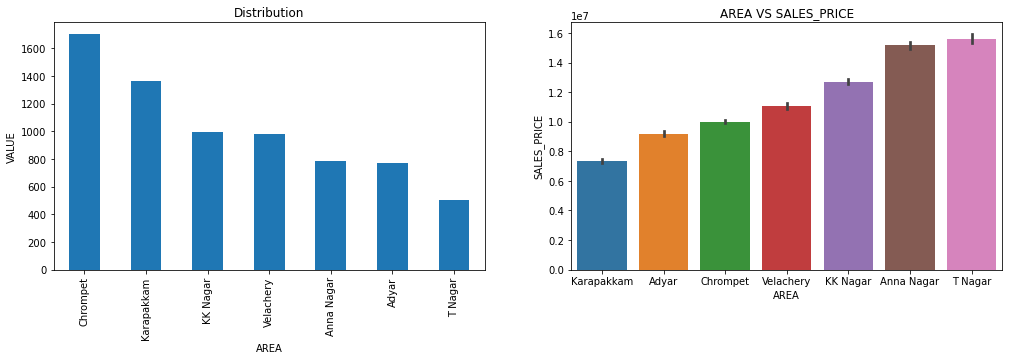

In [23]:
plt.figure(figsize =(17,10))

plt.subplot(2,2,1)
#sns.barplot(x=area.index,y=area.values,data=df)
df.AREA.value_counts().plot(kind = 'bar')
plt.xlabel('AREA')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='AREA',y='SALES_PRICE',data=df, order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA VS SALES_PRICE')


Distribution of the AREA Column infers that Chrompet has the most number of Houses/Building sold.

The AREA vs SALES_PRICE plot shows a linear relationship between them. so that label encoding should be done for the feature.

Text(0.5, 1.0, 'No of Bedrooms VS Sales Price')

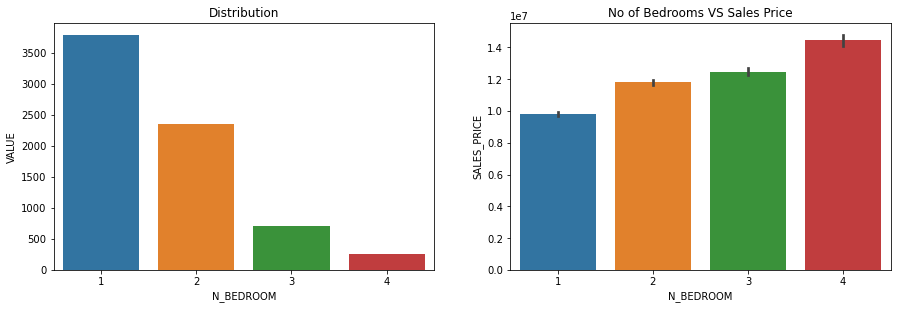

In [24]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='N_BEDROOM', data = df, order = df['N_BEDROOM'].value_counts().index)
plt.xlabel('N_BEDROOM')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df, order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('No of Bedrooms VS Sales Price')

Distribution of the N_BEDROOM Column infers most of Sold House/Building are having single(1) bedroom.

The N_BEDROOM vs SALES_PRICE plot shows a linear relationship between them. No encoding need since they are having numerical values.

Text(0.5, 1.0, 'No of Bathrooms VS Sales Price')

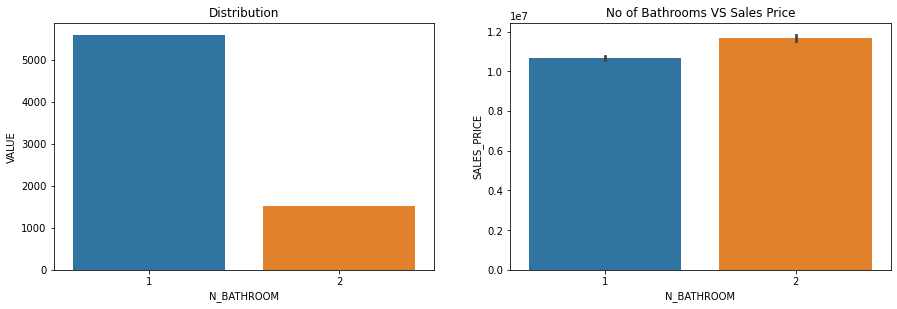

In [25]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='N_BATHROOM', data = df, order = df['N_BATHROOM'].value_counts().index)
plt.xlabel('N_BATHROOM')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df, order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('No of Bathrooms VS Sales Price')

Distribution of the N_BATHROOM Column infers most of Sold House/Building are having single(1) bathroom.

The N_BATHROOM vs SALES_PRICE plot shows a linear relationship between them. No encoding need since they are having numerical values.

Text(0.5, 1.0, 'No of Rooms VS Sales Price')

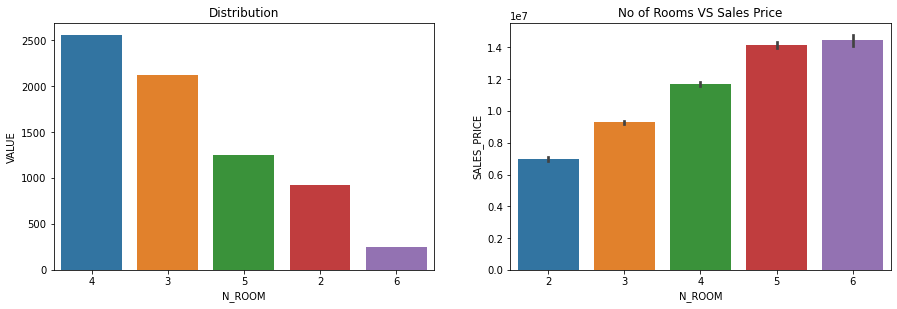

In [26]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='N_ROOM', data = df, order = df['N_ROOM'].value_counts().index)
plt.xlabel('N_ROOM')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df, order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('No of Rooms VS Sales Price')

Distribution of the N_ROOM Column infers most of house/Building Sold are having 4 Rooms.

The N_ROOM vs SALES_PRICE plot shows a linear relationship between them. No encoding need since they are having numerical values.

Text(0.5, 1.0, 'Sale condition of property VS Sales Price')

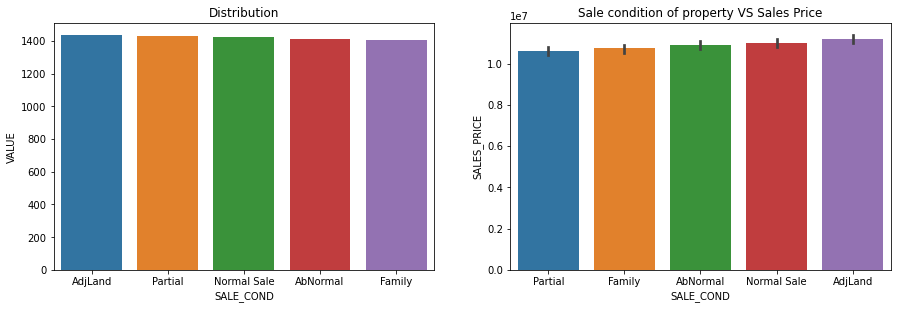

In [27]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='SALE_COND', data = df, order = df['SALE_COND'].value_counts().index)
plt.xlabel('SALE_COND')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df, order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('Sale condition of property VS Sales Price')

Distribution of the SALE_COND Column infers they are having uniform distributions.

There is no relationship between SALE_COND and SALES_PRICE column, so that we drop the feature.  

Text(0.5, 1.0, 'Parking Facility VS Sales Price')

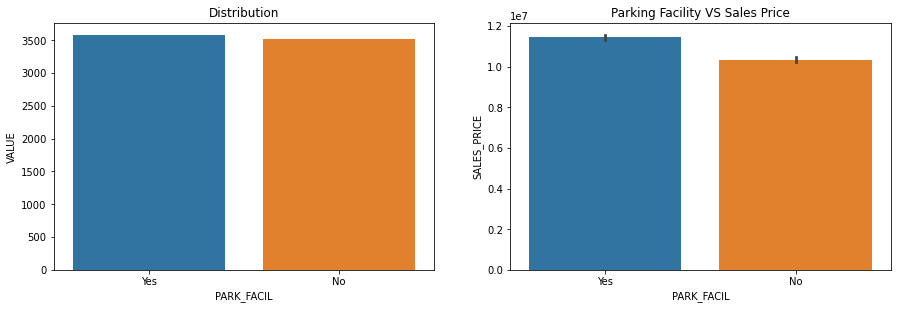

In [28]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='PARK_FACIL', data = df, order = df['PARK_FACIL'].value_counts().index)
plt.xlabel('PARK_FACIL')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.title('Parking Facility VS Sales Price')

Distribution of the PARK_FACIL Column infers they are having uniform distributions.

There's a relationship between PARK_FACIL and SALES_PRICE. Since its a binary categorical feature we folow label encoding.

Text(0.5, 1.0, 'Type of Building VS Sales Price')

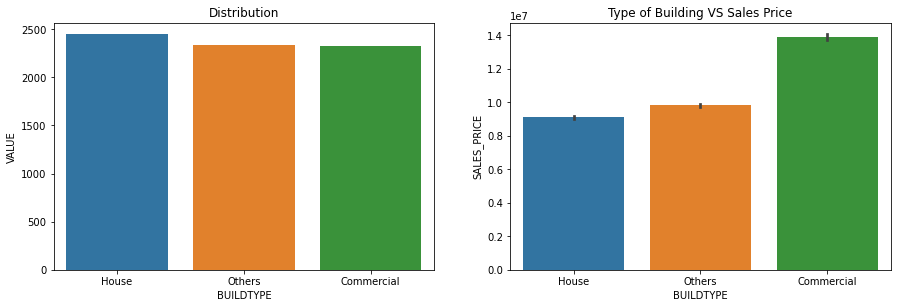

In [29]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='BUILDTYPE', data = df, order = df['BUILDTYPE'].value_counts().index)
plt.xlabel('BUILDTYPE')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df, order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('Type of Building VS Sales Price')

Distribution of the BUILD_TYPE Column infers most of building sold are House.

The BUILD_TYPE vs SALES_PRICE plot didn't shows any linear relationship between them. So one hot encoding can be performed to the feature.

Text(0.5, 1.0, 'Utility Available VS Sales Price')

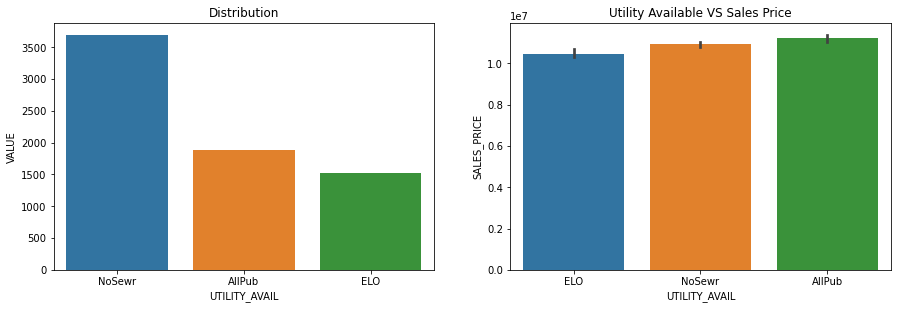

In [30]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='UTILITY_AVAIL', data = df, order = df['UTILITY_AVAIL'].value_counts().index)
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df, order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('Utility Available VS Sales Price')

Distribution of the UTILITY_AVAIL Column infers most of House/building sold are not having any sewage system.

The UTILITY_AVAIL vs SALES_PRICE plot shows a linear relationship between them. So label encoding can be performed to the feature.

Text(0.5, 1.0, 'Street VS Sales Price')

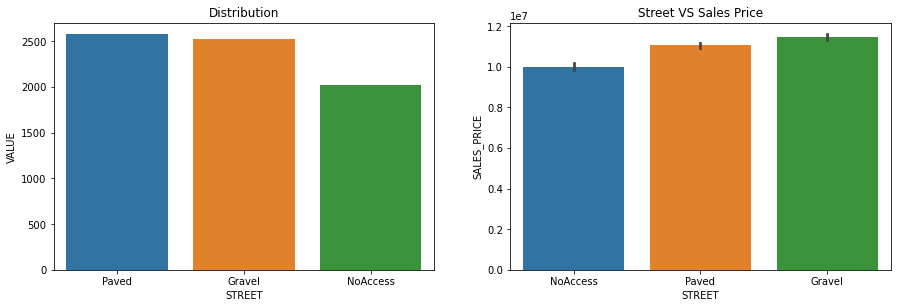

In [31]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='STREET', data = df, order = df['STREET'].value_counts().index)
plt.xlabel('STREET')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='STREET',y='SALES_PRICE',data=df, order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('Street VS Sales Price')

Distribution of the STREET Column infers most of House/building sold are having paved/Gravel roads.

The STREET vs SALES_PRICE plot shows a linear relationship between them. So label encoding can be performed to the feature.

Text(0.5, 1.0, 'MZZONE VS Sales Price')

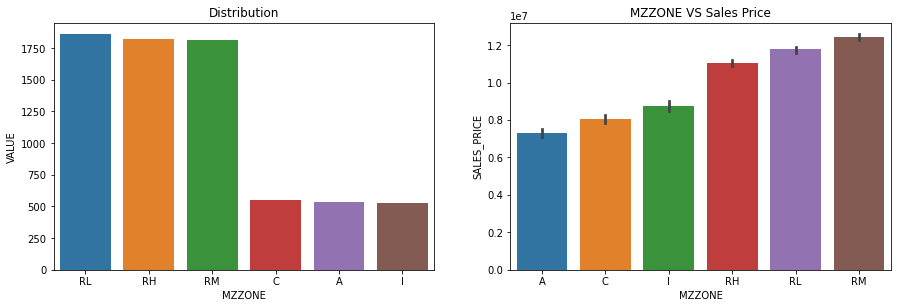

In [32]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.countplot(x='MZZONE', data = df, order = df['MZZONE'].value_counts().index)
plt.xlabel('MZZONE')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df, order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE VS Sales Price')

Distribution of the MZZONE Column infers that the RL,RH,RM are having similar distributions whereas C,A,I steeps and having similar Distributions.

The MZZONE vs SALES_PRICE plot shows a linear relationship between them. But A,C,I follows a separate linear relationship and RH,RL,RM follows another linear relationship. So label encoding can be performed to the feature.

Text(0.5, 1.0, 'INT_SQFT VS Sales Price')

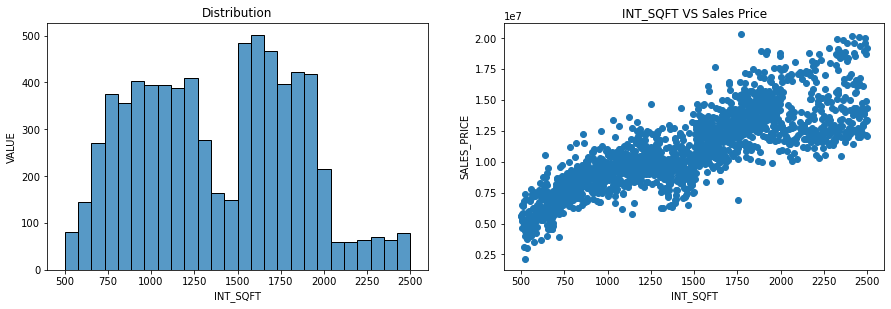

In [33]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.histplot(x='INT_SQFT', data = df)
plt.xlabel('INT_SQFT')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
df.groupby('INT_SQFT')['SALES_PRICE'].mean().plot(style='o')
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.title('INT_SQFT VS Sales Price')

Distribution of the INT_SQFT Column follows bimodal distribution.

The INT_SQFT vs SALES_PRICE plot shows a linear relationship between them.

In [34]:
df[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


The INT_SQFT vs SALES_PRICE correlation value confirms there's good linear relationship between them.

Text(0.5, 1.0, 'Distance from Mainroad VS Sales Price')

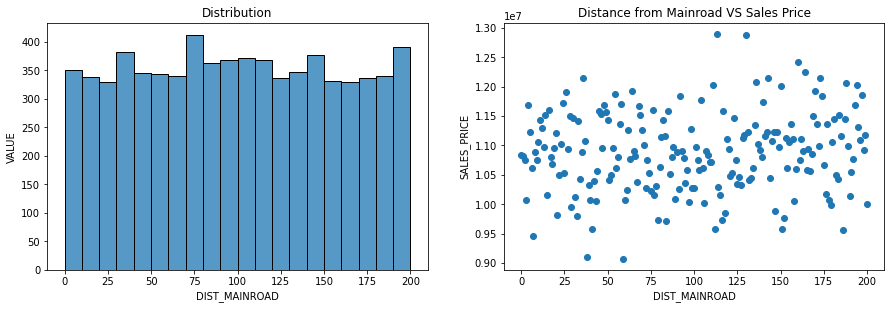

In [35]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.histplot(x='DIST_MAINROAD', data = df)
plt.xlabel('DIST_MAINROAD')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
df.groupby('DIST_MAINROAD')['SALES_PRICE'].mean().plot(style='o')
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.title('Distance from Mainroad VS Sales Price')

Distribution of the DIST_MAINROAD Column follows uniform distribution with occasional high.

The INT_SQFT vs SALES_PRICE plot didn't show any relationship between them.

In [36]:
df[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


The DIST_MAINROAD vs SALES_PRICE correlation value confirms there's no linear relationship between them.

### Transformation of the feature

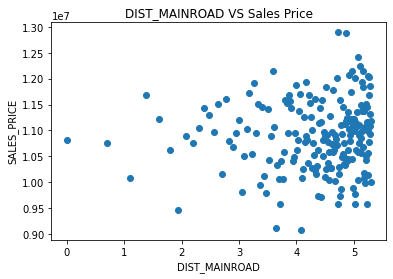

,TRANS_DIST_MAINROAD,SALES_PRICE
TRANS_DIST_MAINROAD,1.000000,0.011282
SALES_PRICE,0.011282,1.000000


In [37]:
df['TRANS_DIST_MAINROAD'] = np.log(df['DIST_MAINROAD'])
# np.power(df['DIST_MAINROAD'],3) 
df.groupby('TRANS_DIST_MAINROAD')['SALES_PRICE'].mean().plot(style='o')
#df.plot(x='TRANS_DIST_MAINROAD', y='SALES_PRICE', style='o')
plt.title('DIST_MAINROAD VS Sales Price')
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.show()
df[['TRANS_DIST_MAINROAD','SALES_PRICE']].corr()

1) There is no relationship between DIST_MAINROAD and SALES_PRICE
2) Have tried all transformations - still not able to see a relationship

Text(0.5, 1.0, 'QS_ROOMS VS Sales Price')

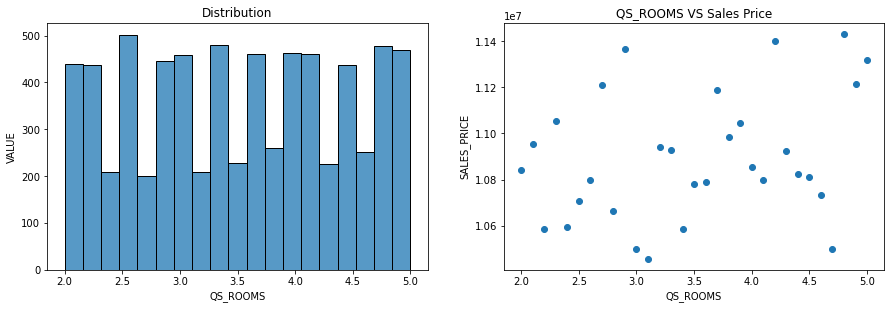

In [38]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.histplot(x='QS_ROOMS', data = df)
plt.xlabel('QS_ROOMS')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
df.groupby('QS_ROOMS')['SALES_PRICE'].mean().plot(style='o')
plt.xlabel('QS_ROOMS')
plt.ylabel('SALES_PRICE')
plt.title('QS_ROOMS VS Sales Price')

Distribution of the QS_ROOMS Column follows uniform distribution with occasional steep. Its a masked feature since we are not sure about its properties.

The QS_ROOMS vs SALES_PRICE plot didn't show any relationship between them.

In [39]:
df[['QS_ROOMS','SALES_PRICE']].corr()

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


The QS_ROOMS vs SALES_PRICE correlation value confirms there's no linear relationship between them.

### Transformation of the feature

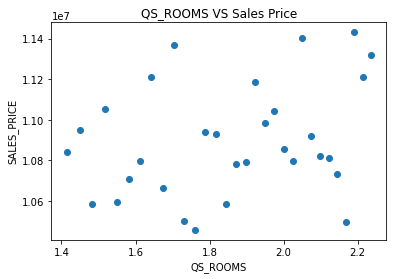

,TRANS_QS_ROOMS,SALES_PRICE
TRANS_QS_ROOMS,1.000000,0.021231
SALES_PRICE,0.021231,1.000000


In [40]:
df['TRANS_QS_ROOMS'] = np.power(df['QS_ROOMS'],0.5)
# np.power(df['DIST_MAINROAD'],3) 
df.groupby('TRANS_QS_ROOMS')['SALES_PRICE'].mean().plot(style='o')
#df.plot(x='TRANS_DIST_MAINROAD', y='SALES_PRICE', style='o')
plt.title('QS_ROOMS VS Sales Price')
plt.xlabel('QS_ROOMS')
plt.ylabel('SALES_PRICE')
plt.show()
df[['TRANS_QS_ROOMS','SALES_PRICE']].corr()

1) There is no relationship between QS_ROOM and SALES_PRICE
2) Have tried all transformations - still not able to see a relationship

Text(0.5, 1.0, 'QS_BATHROOM VS Sales Price')

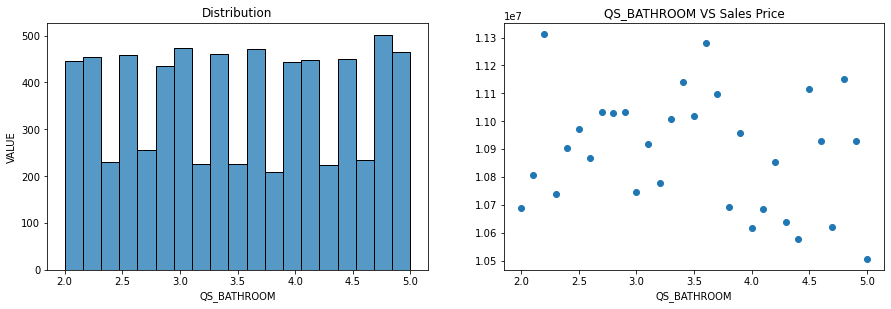

In [41]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.histplot(x='QS_BATHROOM', data = df)
plt.xlabel('QS_BATHROOM')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().plot(style='o')
plt.title('QS_BATHROOM VS Sales Price')

Distribution of the QS_BATHROOM Column follows uniform distribution with occasional steep. Its a masked feature since we are not sure about its properties.

The QS_BATHROOM vs SALES_PRICE plot didn't show any relationship between them.

In [42]:
df[['QS_BATHROOM','SALES_PRICE']].corr()

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


The QS_BATHROOM vs SALES_PRICE correlation value confirms there's no linear relationship between them.

### Transformation of the feature

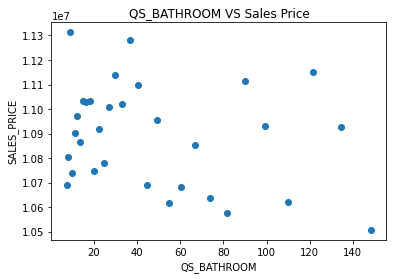

,TRANS_QS_BATHROOM,SALES_PRICE
TRANS_QS_BATHROOM,1.000000,-0.013562
SALES_PRICE,-0.013562,1.000000


In [43]:
df['TRANS_QS_BATHROOM'] = np.exp(df['QS_BATHROOM'])
# np.power(df['DIST_MAINROAD'],3) 
df.groupby('TRANS_QS_BATHROOM')['SALES_PRICE'].mean().plot(style='o')
#df.plot(x='TRANS_DIST_MAINROAD', y='SALES_PRICE', style='o')
plt.title('QS_BATHROOM VS Sales Price')
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.show()
df[['TRANS_QS_BATHROOM','SALES_PRICE']].corr()

1) There is no relationship between QS_BATHROOM and SALES_PRICE
2) Have tried all transformations - still not able to see a relationship

Text(0.5, 1.0, 'QS_BEDROOM VS Sales Price')

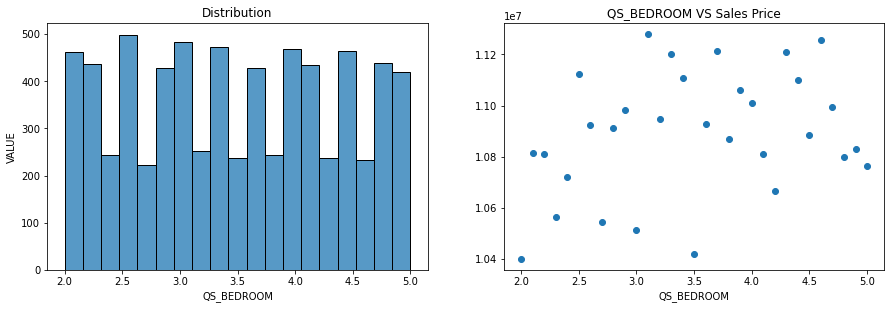

In [44]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.histplot(x='QS_BEDROOM', data = df)
plt.xlabel('QS_BEDROOM')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
df.groupby('QS_BEDROOM')['SALES_PRICE'].mean().plot(style='o')
plt.title('QS_BEDROOM VS Sales Price')

Distribution of the QS_BEDROOM Column follows uniform distribution with occasional steep. Its a masked feature since we are not sure about its properties.

The QS_BEDROOM vs SALES_PRICE plot didn't show any relationship between them.

In [45]:
df[['QS_BEDROOM','SALES_PRICE']].corr()

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


The QS_BATHROOM vs SALES_PRICE correlation value confirms there's no linear relationship between them.

### Transformation of the feature

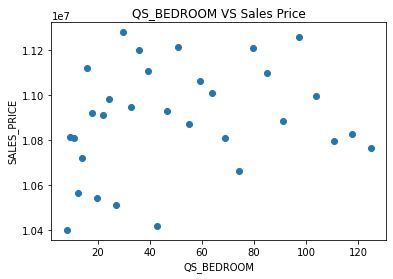

,TRANS_QS_BEDROOM,SALES_PRICE
TRANS_QS_BEDROOM,1.000000,0.014221
SALES_PRICE,0.014221,1.000000


In [46]:
df['TRANS_QS_BEDROOM'] = np.power(df['QS_BEDROOM'],3)
# np.power(df['DIST_MAINROAD'],3) 
df.groupby('TRANS_QS_BEDROOM')['SALES_PRICE'].mean().plot(style='o')
#df.plot(x='TRANS_DIST_MAINROAD', y='SALES_PRICE', style='o')
plt.title('QS_BEDROOM VS Sales Price')
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.show()
df[['TRANS_QS_BEDROOM','SALES_PRICE']].corr()

1) There is no relationship between QS_BEDROOM and SALES_PRICE
2) Have tried all transformations - still not able to see a relationship

Text(0.5, 1.0, 'QS_OVERALL VS Sales Price')

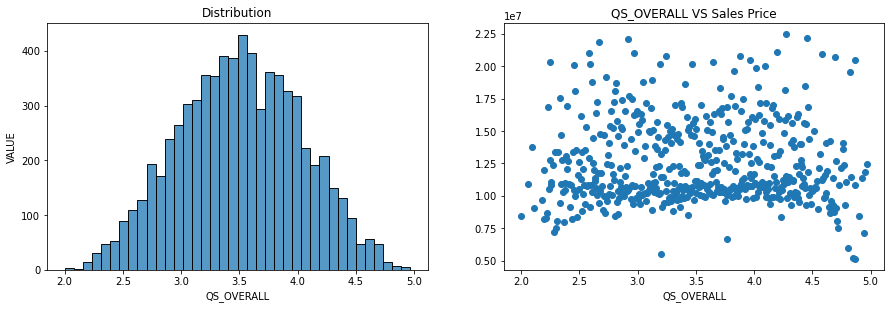

In [47]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.histplot(x='QS_OVERALL', data = df)
plt.xlabel('QS_OVERALL')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
df.groupby('QS_OVERALL')['SALES_PRICE'].mean().plot(style='o')
plt.title('QS_OVERALL VS Sales Price')

Distribution of the QS_OVERALL Column follows noraml distribution. Its a masked feature since we are not sure about its properties.

The QS_OVERALL vs SALES_PRICE plot didn't show any relationship between them.

In [48]:
df[['QS_OVERALL','SALES_PRICE']].corr()

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020016
SALES_PRICE,0.020016,1.000000


The QS_OVERALL vs SALES_PRICE correlation value confirms there's no linear relationship between them.

### Transformation of the feature

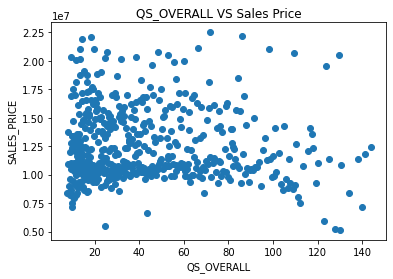

,TRANS_QS_OVERALL,SALES_PRICE
TRANS_QS_OVERALL,1.000000,0.018681
SALES_PRICE,0.018681,1.000000


In [49]:
df['TRANS_QS_OVERALL'] = np.exp(df['QS_OVERALL'])
# np.power(df['DIST_MAINROAD'],3) 
df.groupby('TRANS_QS_OVERALL')['SALES_PRICE'].mean().plot(style='o')
#df.plot(x='TRANS_DIST_MAINROAD', y='SALES_PRICE', style='o')
plt.title('QS_OVERALL VS Sales Price')
plt.xlabel('QS_OVERALL')
plt.ylabel('SALES_PRICE')
plt.show()
df[['TRANS_QS_OVERALL','SALES_PRICE']].corr()

1) There is no relationship between QS_OVERALL and SALES_PRICE
2) Have tried all transformations - still not able to see a relationship

Text(0.5, 1.0, 'HOUSE_AGE VS Sales Price')

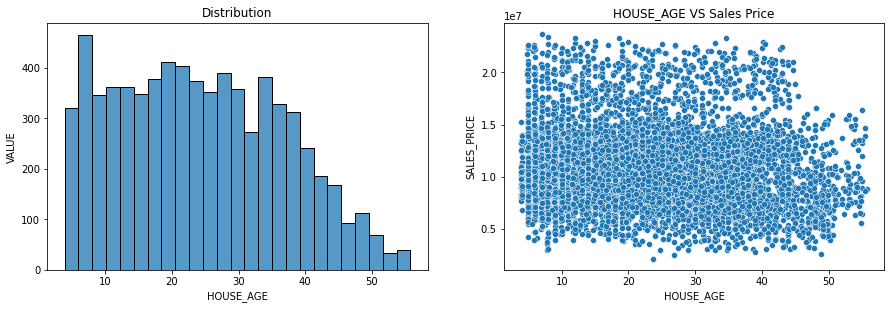

In [50]:
plt.figure(figsize =(15,10))

plt.subplot(2,2,1)
sns.histplot(x='HOUSE_AGE', data = df)
plt.xlabel('HOUSE_AGE')
plt.ylabel('VALUE')
plt.title('Distribution')

plt.subplot(2,2,2)
#df.groupby('HOUSE_AGE')['SALES_PRICE'].mean().plot(style='o')
sns.scatterplot(x = 'HOUSE_AGE', y = 'SALES_PRICE', data = df)
plt.title('HOUSE_AGE VS Sales Price')

Distribution of the HOUSE_AGE Column distribution steeps as age of house increases. Its a derived feature added to dataset.

The HOUSE_AGE vs SALES_PRICE plot shows there is a slight decrease in price as the Age of the house increases.

In [51]:
df[['HOUSE_AGE','SALES_PRICE']].corr()

,HOUSE_AGE,SALES_PRICE
HOUSE_AGE,1.000000,-0.119285
SALES_PRICE,-0.119285,1.000000


The HOUSE_AGE vs SALES_PRICE correlation value confirms there's no linear relationship between them.

### Transformation of the feature

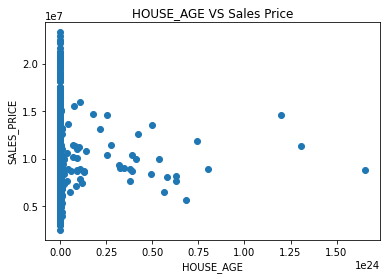

,TRANS_HOUSE_AGE,SALES_PRICE
TRANS_HOUSE_AGE,1.000000,-0.011302
SALES_PRICE,-0.011302,1.000000


In [52]:
df['TRANS_HOUSE_AGE'] = np.exp(df['HOUSE_AGE'])
# np.power(df['DIST_MAINROAD'],3) 
df.groupby('TRANS_HOUSE_AGE')['SALES_PRICE'].mean().plot(style='o')
#df.plot(x='TRANS_DIST_MAINROAD', y='SALES_PRICE', style='o')
plt.title('HOUSE_AGE VS Sales Price')
plt.xlabel('HOUSE_AGE')
plt.ylabel('SALES_PRICE')
plt.show()
df[['TRANS_HOUSE_AGE','SALES_PRICE']].corr()

1) There is no linear relationship between HOUSE_AGE and SALES_PRICE
2) Have tried all transformations - still not able to see a good linear relationship

In [53]:
#Dropping Transformed features from dataset 
df = df.drop(['TRANS_DIST_MAINROAD',
       'TRANS_QS_ROOMS', 'TRANS_QS_BATHROOM', 'TRANS_QS_BEDROOM',
       'TRANS_QS_OVERALL', 'TRANS_HOUSE_AGE'], axis=1)

In [54]:
#Dropping SALE_COND feature since its not affecting the sale price 
df = df.drop(['SALE_COND'], axis=1)

### Encoding

In [55]:
#Label Encoding performed for below categorical features
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1, 'No':0})
df['AREA'] = df['AREA'].map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar':5, 'T Nagar':6})
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'ELO':0, 'NoSewr':1, 'AllPub':2})
df['STREET'] = df['STREET'].map({'NoAccess':0, 'Paved':1, 'Gravel':2})
df['MZZONE'] = df['MZZONE'].map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})


In [56]:
#One Hot Encoding performed for below categorical feature
def onehot_encode(df, cols, pfxs):
    df = df.copy()
    for col, pfx in zip(cols, pfxs):
        dummies = pd.get_dummies(df[col], prefix = pfx)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1)
    return df

In [57]:
df = onehot_encode(
    df, 
    ['BUILDTYPE'], 
    ['BUILDTYPE']
)

### Data Splitting

Since we are trying to fit Linear Regreesion Model droppping features which are not having linear relationship with target.
X_lin, Y_lin are the features and target used for fitting a Linear Regression Model

In [58]:
X_lin = df.loc[:, ~df.columns.isin(['SALES_PRICE','DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'HOUSE_AGE'])]
y_lin = df['SALES_PRICE']


Except the House_Age Column we are removing the columns that are  removed for Linear Regression Model. 
X, y are the features and target used for fitting Other Regression Model

In [59]:
X = df.loc[:, ~df.columns.isin(['SALES_PRICE','DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL'])]
y = df['SALES_PRICE']

X_lin_train, X_lin_test, y_lin_train, y_lin_test are the data split for Linear Regression Model
X_train, X_test, y_train, y_test are the data split for Other Regression Model

In [60]:
from sklearn.model_selection import train_test_split
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling

In [61]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable

#Scaling Features of Linear Regression Model
scaler.fit(X_lin_train,y_lin_train) # we are finding the values of mean and sd from the td
X_lin_train_scaled = scaler.transform(X_lin_train) # fit (mean, sd) and then transform the training data
X_lin_test_scaled = scaler.transform(X_lin_test) # transform the test data 

#Scaling Features of Other Regression Model
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

### Model Training

#### Linear Regression

In [62]:
#Trying fit the Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_lin_train_scaled, y_lin_train)
y_pred = regressor.predict(X_lin_test_scaled)
y_pred

array([14117789.98097204, 12924854.4328806 , 19065977.91464835, ...,
       13650914.62498743, 15935586.33424057,  8105802.66694805])

### Evaluation of Model

In [63]:
from sklearn import metrics
R2_lin = metrics.r2_score(y_test,y_pred)
print('R2- SCORE:', R2_lin)

R2- SCORE: 0.9172241539046856


As per the R2 Score Linear Regression is a Good model

### Other Regression Models and their Performance 

#### K-Nearest Neighbor Algorithm 

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score   
    
#Finding Best Values of K and using cross validation to training dataset
k_scores =[] 
k_range = range(1, 101)
for num_neighbors in k_range:
    knn = KNeighborsRegressor(n_neighbors=num_neighbors)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv = 10, scoring = make_scorer(metrics.r2_score))
    k_scores.append(scores.mean())

In [65]:
print("Best K Value:",np.array(k_scores).argmax() + 1)

Best K Value: 5


In [66]:
#fitting the model for best value of k
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)
y_pred

array([13494520., 12324888., 19603922., ..., 14320344., 17884704.,
        8771595.])

#### Evaluation of Model

In [67]:
from sklearn import metrics
R2_knn = metrics.r2_score(y_test,y_pred)
print('R2- SCORE:', R2_knn)

R2- SCORE: 0.9555444002236116


As the R2 Score of KNN Regression is a Good model

#### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor 

#Finding Best max depth of tree and using cross validation to training dataset
max_scores =[] 
depth_range = range(1, 21)
for i in depth_range:
    dtree = DecisionTreeRegressor(max_depth = i, random_state = 5)
    scores = cross_val_score(dtree, X_train_scaled, y_train, cv = 10, scoring = make_scorer(metrics.r2_score))
    max_scores.append(scores.mean())
CV_curve = pd.DataFrame(max_scores)

In [92]:
print("Max Depth:",np.array(max_scores).argmax() + 1)

Max Depth: 15


Ploting the Cross validation scores

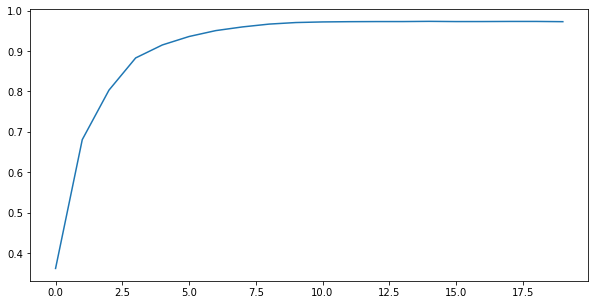

In [93]:
#sns.lineplot(x = depth_range, y = max_scores);
plt.figure(figsize=(10,5))
plt.plot(CV_curve)
plt.show()

In [94]:
#fitting the model for best max depth 
dtree = DecisionTreeRegressor(max_depth = 15).fit(X_train_scaled,y_train)
y_pred = dtree.predict(X_test_scaled)
y_pred

array([13796445.83333333, 12459280.        , 19376950.        , ...,
       12946730.        , 17722310.        ,  8410150.        ])

#### Evaluation of Model

In [95]:
from sklearn import metrics
R2_dtree = metrics.r2_score(y_test,y_pred)
print('R2- SCORE of Decision Tree:', R2_dtree)

R2- SCORE of Decision Tree: 0.9754623039871421


As per the R2 Score Decision Tree is a Good model

#### Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Finding Best max depth& n_estimators and using cross validation to training dataset
max_cross_val=-1
max_depth_best=0
n_estimators_best=0
for est in range(90, 126, 5):
    for md in range(6,21,1):
        print("\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b est=",est,"md=",md)
        rf = RandomForestRegressor(n_estimators= est,max_features='sqrt')
        cross_val = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()
        if cross_val > max_cross_val:
            max_cross_val = cross_val
            n_estimators_best=est
            max_depth_best=md

print("Number of estimators:",n_estimators_best,"and max depth",max_depth_best," with max cross validation score")

 est= 90 md= 6
 est= 90 md= 7
 est= 90 md= 8
 est= 90 md= 9
 est= 90 md= 10
 est= 90 md= 11
 est= 90 md= 12
 est= 90 md= 13
 est= 90 md= 14
 est= 90 md= 15
 est= 90 md= 16
 est= 90 md= 17
 est= 90 md= 18
 est= 90 md= 19
 est= 90 md= 20
 est= 95 md= 6
 est= 95 md= 7
 est= 95 md= 8
 est= 95 md= 9
 est= 95 md= 10
 est= 95 md= 11
 est= 95 md= 12
 est= 95 md= 13
 est= 95 md= 14
 est= 95 md= 15
 est= 95 md= 16
 est= 95 md= 17
 est= 95 md= 18
 est= 95 md= 19
 est= 95 md= 20
 est= 100 md= 6
 est= 100 md= 7
 est= 100 md= 8
 est= 100 md= 9
 est= 100 md= 10
 est= 100 md= 11
 est= 100 md= 12
 est= 100 md= 13
 est= 100 md= 14
 est= 100 md= 15
 est= 100 md= 16
 est= 100 md= 17
 est= 100 md= 18
 est= 100 md= 19
 est= 100 md= 20
 est= 105 md= 6
 est= 105 md= 7
 est= 105 md= 8
 est= 105 md= 9
 est= 105 md= 10
 est= 105 md= 11
 est= 105 md= 12
 est= 105 md= 13
 est= 105 md= 14
 est= 105 md= 15
 est= 105 md= 16
 est= 105 md= 17
 est= 105 md= 18
 est= 105 md= 19
 est= 105 md= 20
 est= 110 md= 6
 est= 110 

#### Evaluation of Model

In [114]:
rf = RandomForestRegressor(n_estimators= n_estimators_best, max_depth=max_depth_best,max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)


R2_rf = metrics.r2_score(y_test,y_pred)
print('R2- SCORE of Random Forest:', R2_rf)

R2- SCORE of Random Forest: 0.975471636965416


As the R2 Score of Random Fores is a Good model

#### XGBoost Regressor

In [121]:
import xgboost as xgb
from xgboost import XGBRegressor

scores = []
for lr in range(1,101):
    lr=lr/100
    xgr = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 1)
    cross_val=cross_val_score(xgr,X_train_scaled,y_train,cv=10, scoring = make_scorer(metrics.r2_score)).mean()
    scores.append(cross_val)
curve = pd.DataFrame(scores)



Ploting the Cross validation scores

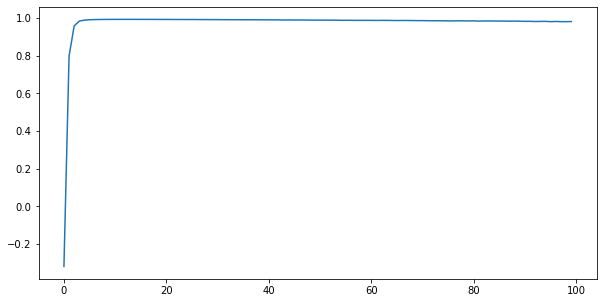

Learning Rate after Cross Validation: 0.14


In [133]:
plt.figure(figsize=(10,5))
plt.plot(curve)
plt.show()

learningRate = (pd.Series(cross_val_range).idxmax()+1)/100
print("Learning Rate after Cross Validation:",learningRate)


#### Evaluation of Model

In [179]:
xgr = xgb.XGBRegressor(learning_rate = learningRate, n_estimators=100, verbosity = 0)

#Converting train set numpy arrays to dataframe whiuch might be useful in finding Feature importance
orig_feature_names = list(X_train.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=orig_feature_names)

xgr.fit(X_train_scaled_df, y_train)
y_pred = xgr.predict(X_test_scaled)

R2_Xgb = metrics.r2_score(y_test,y_pred)
print('R2- SCORE:', R2_Xgb)

R2- SCORE: 0.9940457616324267


Comparing R2 Scores of the different Models

In [180]:
df_models =  pd.DataFrame({"Models": ['Linear', 'KNN', 'Decision Tree','Random Forest','XGBoost'], 
                         "R2_Score":[R2_lin, R2_knn, R2_dtree, R2_rf, R2_Xgb]})
df_models

,Models,R2_Score
0,Linear,0.917224
1,KNN,0.955544
2,Decision Tree,0.975462
3,Random Forest,0.975472
4,XGBoost,0.994046


**Best Model** : XGBRegressor

On evaluating the R2 Scores of various models we can confirm that XGBRegressor is the best fit model for the dataset.

### Feature Importances

<AxesSubplot:>

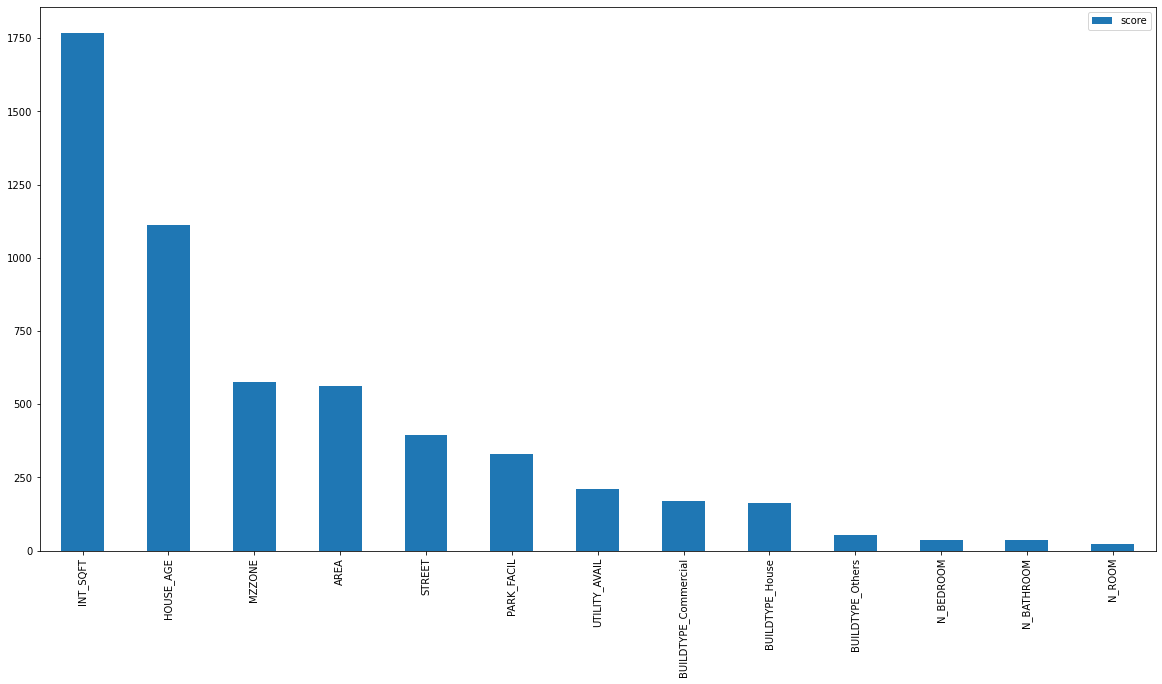

In [181]:
feature_important = xgr.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(40, columns="score").plot(kind='bar', figsize = (20,10))

'SALES_PRICE' of the House is largely depends on 'INT_SQFT', 'HOUSE_AGE', 'MZZONE', 'AREA' and 'STREET'

### Insights we derive from the data for Realstate Agents and Buyers

**REAL ESTATE AGENT :**
If any agent wants to build any type of building in Chennai, I would suggest them to build it in the 'residential medium density' zone at "T Nagar" Location , as the first choice because the price of building is higher than other Area and the zones.

**BUYERS :** If any buyer wants to buy the house/building at cheap price, I would suggest them to buy in Karapakam, because average price is the least there and also check other important factors like the age, Zone, street of the building to arrive the average price of the building.